# Model Comparisons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display

Load the data from the Original, PSU, and Limno models

In [2]:
filename = '../data/tsr_4_seg33_compare_Detroit-Lake_062425.xlsb'
df_original = pd.read_excel(filename, sheet_name='tsr_4_seg33_Original', engine='pyxlsb')
df_psu = pd.read_excel(filename, sheet_name='tsr_4_seg33_PSU', engine='pyxlsb')
df_limno = pd.read_excel(filename, sheet_name='tsr_4_seg33_Limno', engine='pyxlsb')

Clean the column names, removing extra spaces and tabs, and apply to all three data frames

In [3]:
def clean_column_name(col):
    col = col.replace('\t', '').strip()  # Remove tabs and leading/trailing spaces
    if '(' in col and ')' in col:
        name, unit = col.split('(', 1)
        return name.strip() + ' (' + unit.strip()
    return col.strip()

cleaned_columns = [clean_column_name(col) for col in df_limno.columns]

df_original.columns = cleaned_columns
df_psu.columns = cleaned_columns
df_limno.columns = cleaned_columns

Compute the differences between model results

In [4]:
df_limno_minus_psu = df_limno - df_psu
df_psu_minus_original = df_psu - df_original
df_limno_minus_original = df_limno - df_original

Replace the JDAY column with the one from the Limno data frame

In [5]:
df_limno_minus_psu['JDAY'] = df_limno['JDAY']
df_psu_minus_original['JDAY'] = df_limno['JDAY']
df_limno_minus_original['JDAY'] = df_limno['JDAY']

Prepare dictionary of the comparison data frames

In [6]:
comparison_frames = {
    'Limno - PSU': df_limno_minus_psu,
    'PSU - Original': df_psu_minus_original,
    'Limno - Original': df_limno_minus_original
}

Compute summary statistics for each difference data frame (excluding 'JDAY')

In [7]:
summary_stats = {
    'Limno - PSU': df_limno_minus_psu.drop(columns='JDAY').describe().T[['mean', 'std', 'min', 'max']],
    'PSU - Original': df_psu_minus_original.drop(columns='JDAY').describe().T[['mean', 'std', 'min', 'max']],
    'Limno - Original': df_limno_minus_original.drop(columns='JDAY').describe().T[['mean', 'std', 'min', 'max']]
}

Compute and plot relative percent differences for each comparison

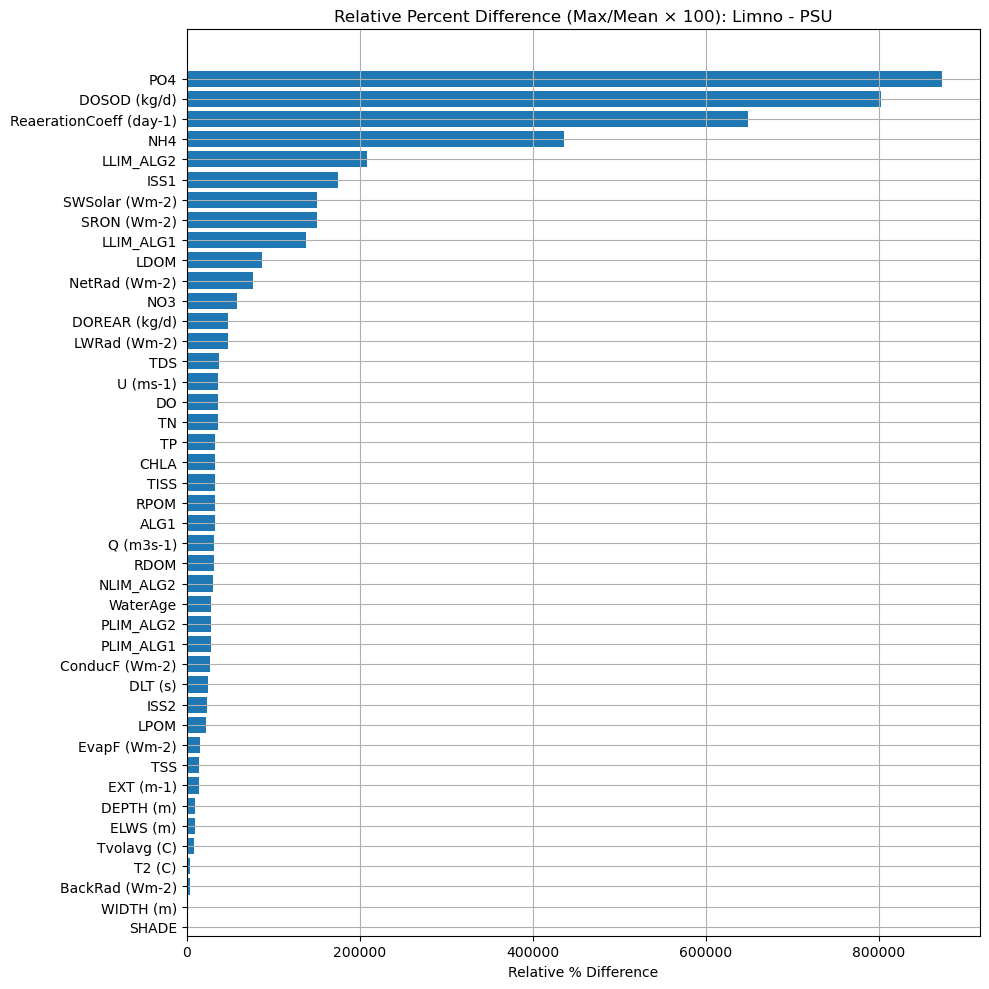

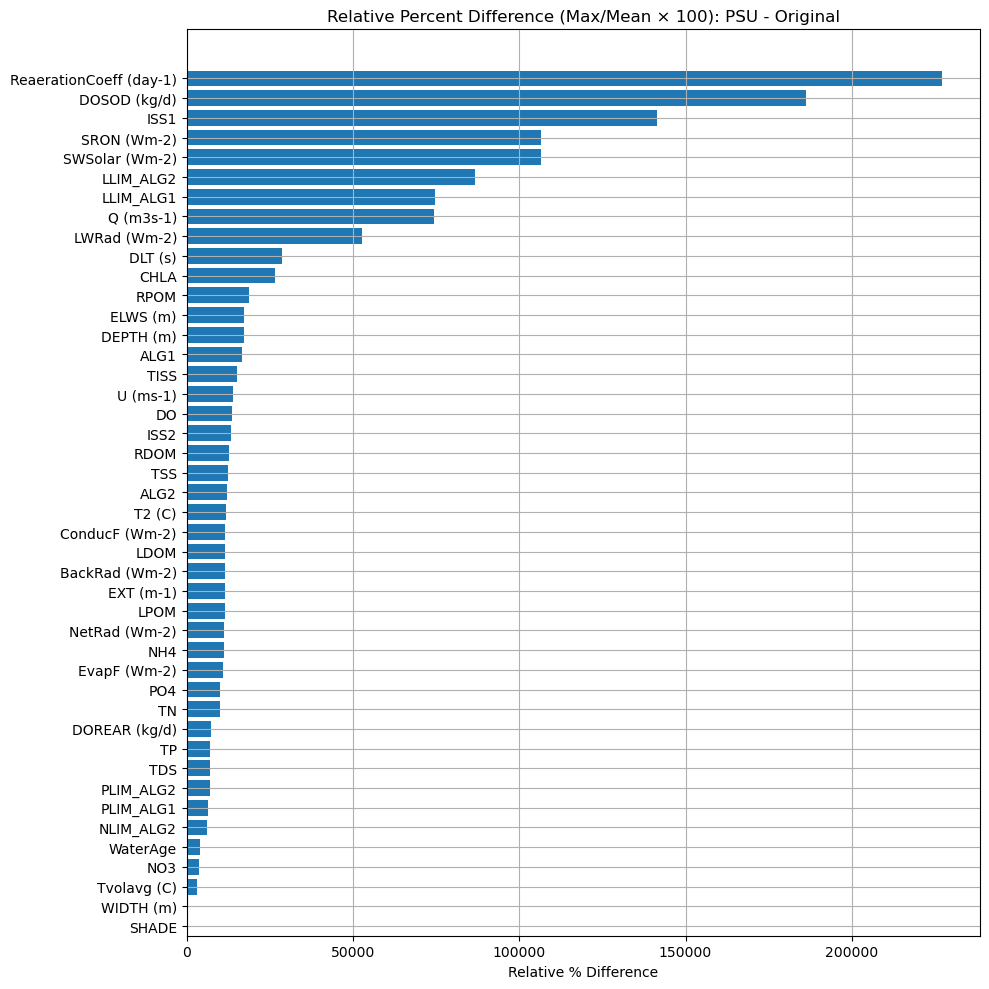

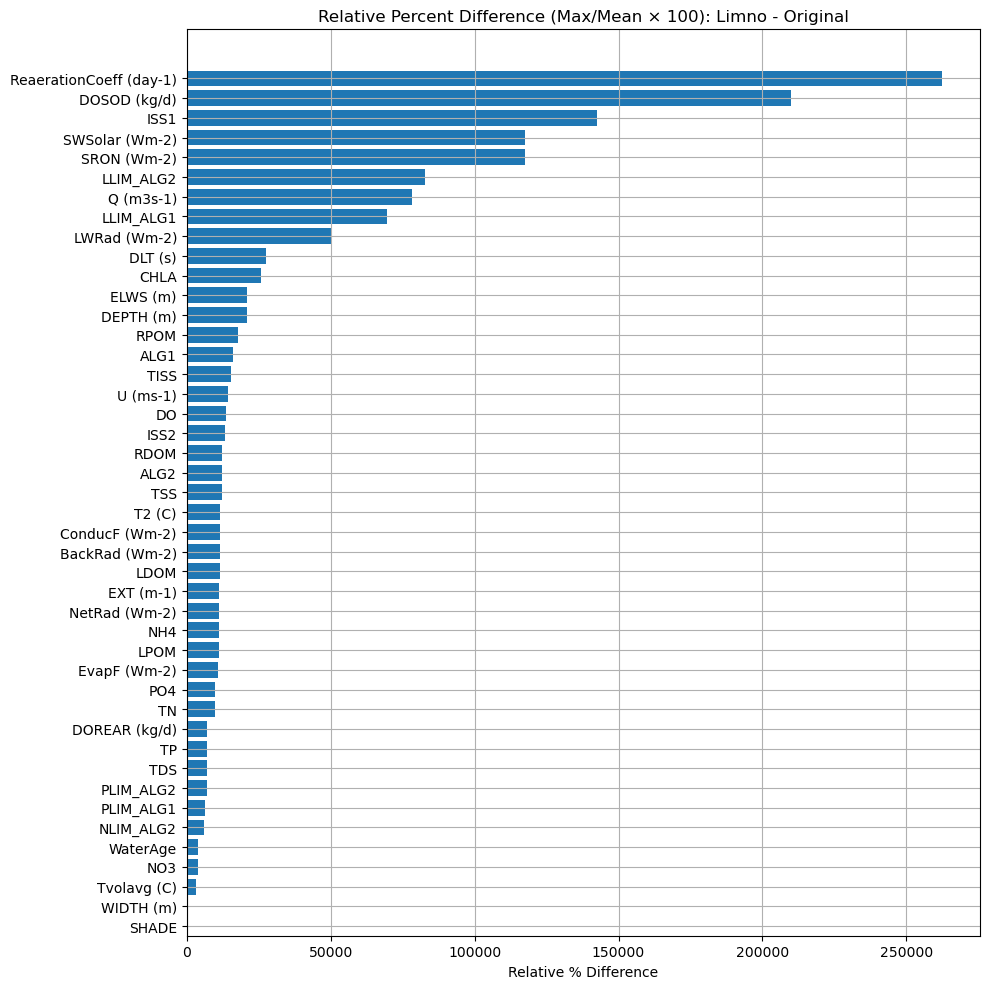

In [8]:
def compute_relative_percent_difference(df):
    df_no_jday = df.drop(columns='JDAY')
    return (df_no_jday.abs().max() / df_no_jday.abs().mean()) * 100

# Compute for all three comparisons
relative_diffs = {
    name: compute_relative_percent_difference(df)
    for name, df in comparison_frames.items()
}

for name, series in relative_diffs.items():
    sorted_series = series.sort_values(ascending=False) # plot all
    # sorted_series = series.sort_values(ascending=False).head(10) # plot top 10 only
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(sorted_series.index, sorted_series.values)
    ax.set_title(f'Relative Percent Difference (Max/Mean × 100): {name}')
    ax.set_xlabel('Relative % Difference')
    ax.grid(True)
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

Plot comparison time series for several key variables

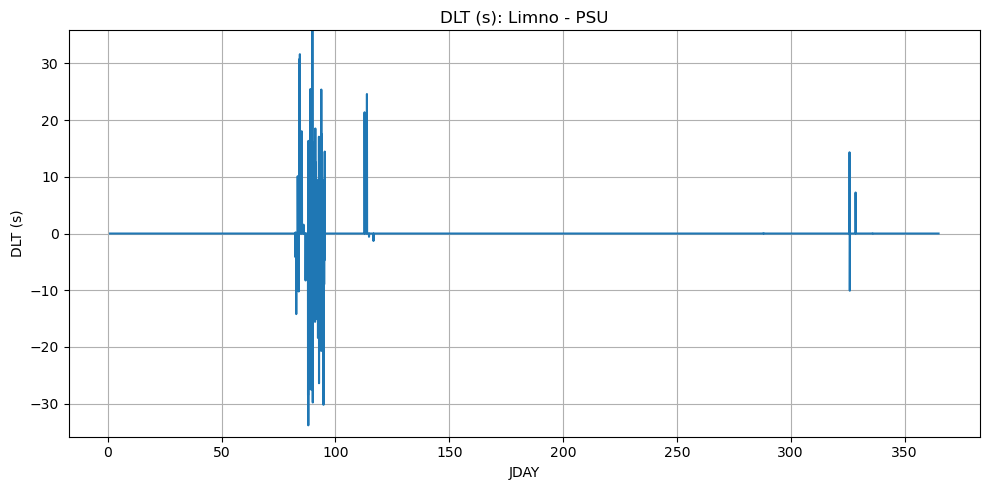

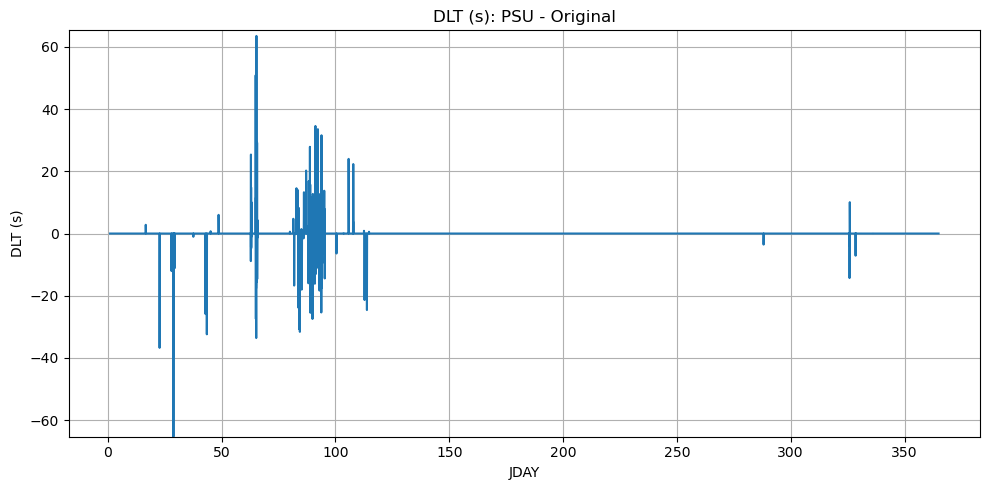

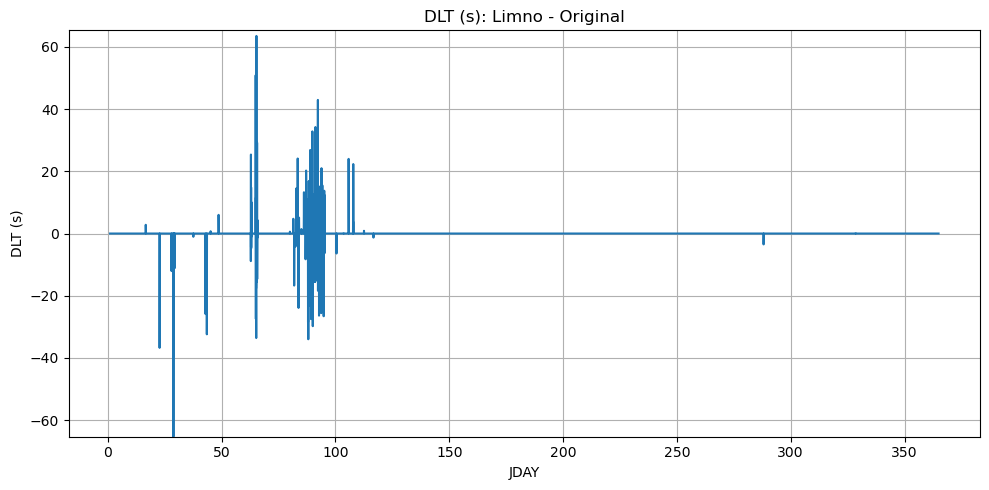

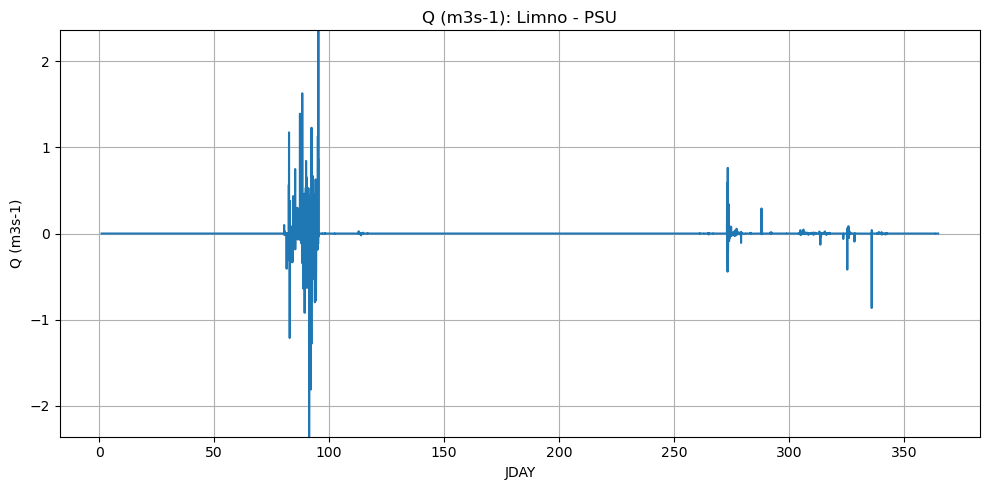

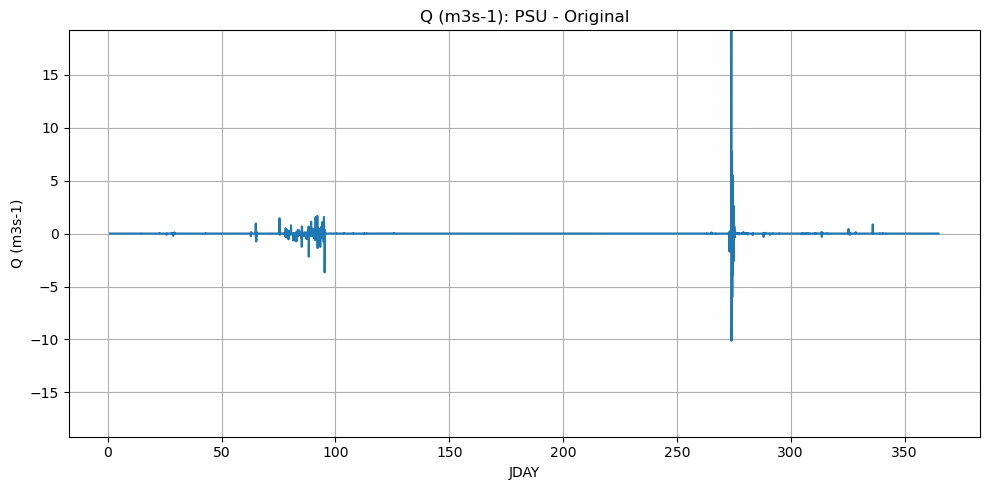

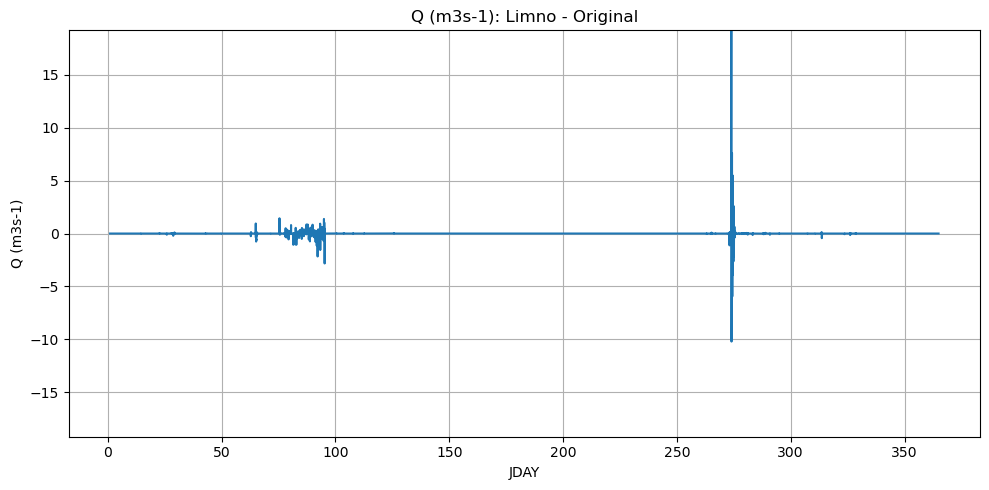

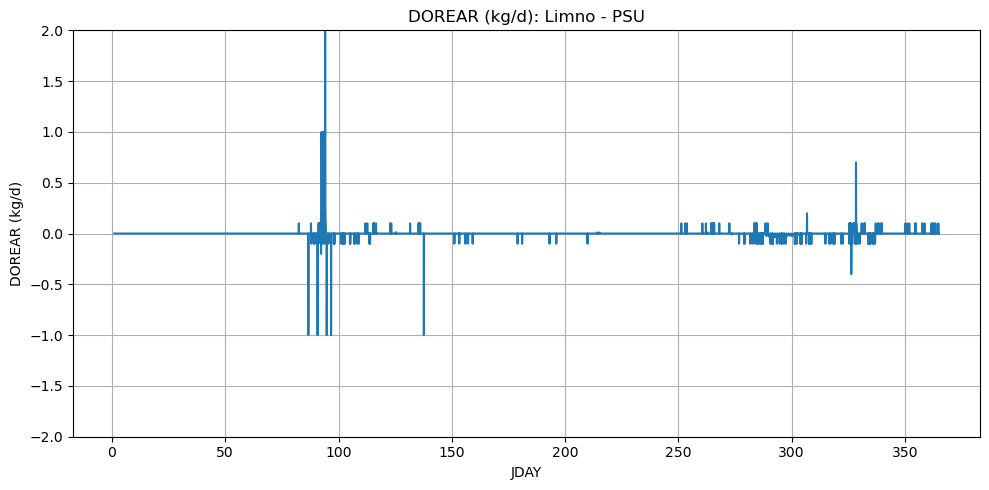

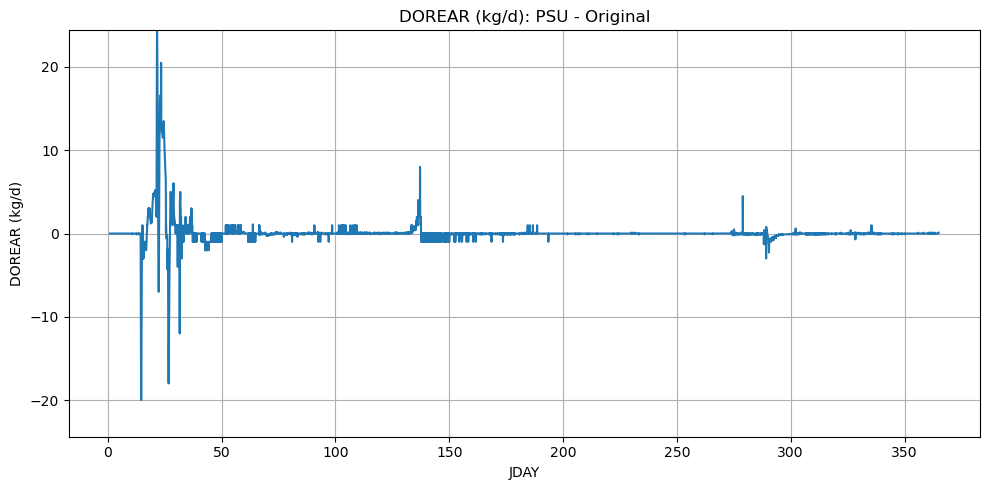

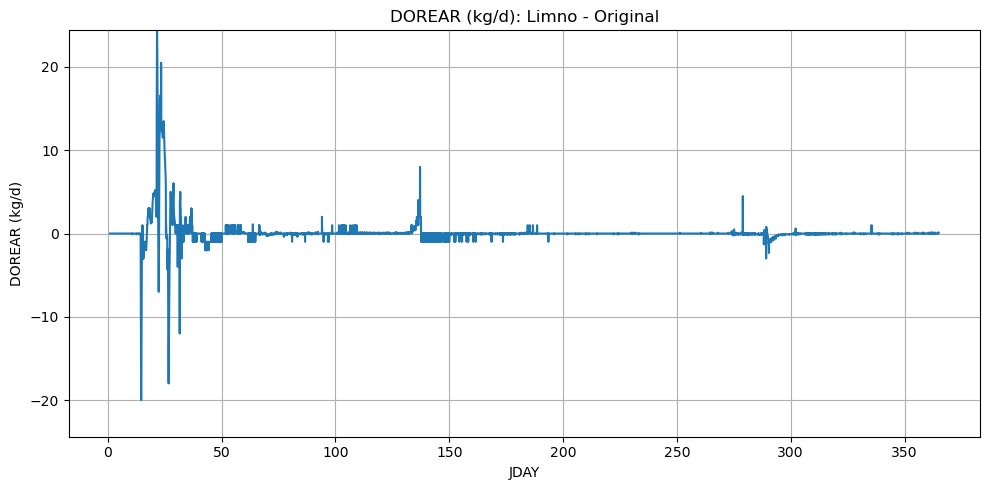

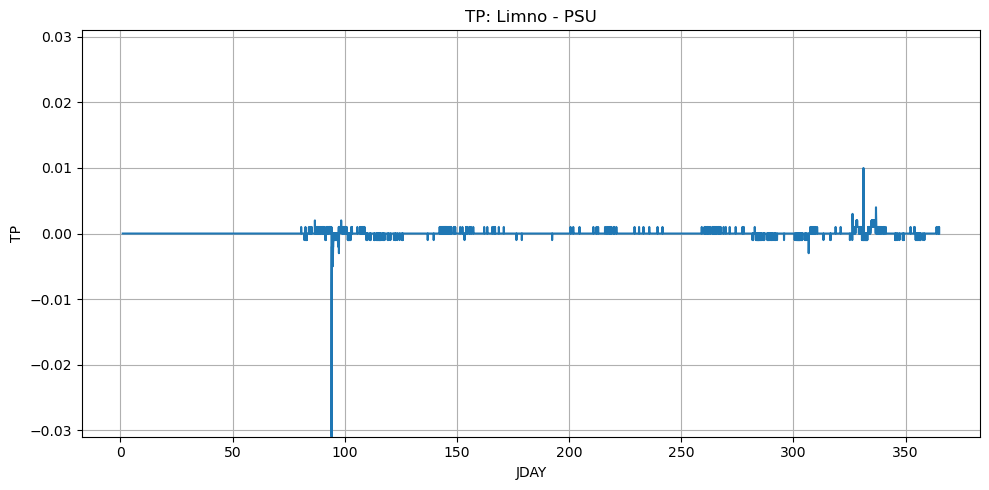

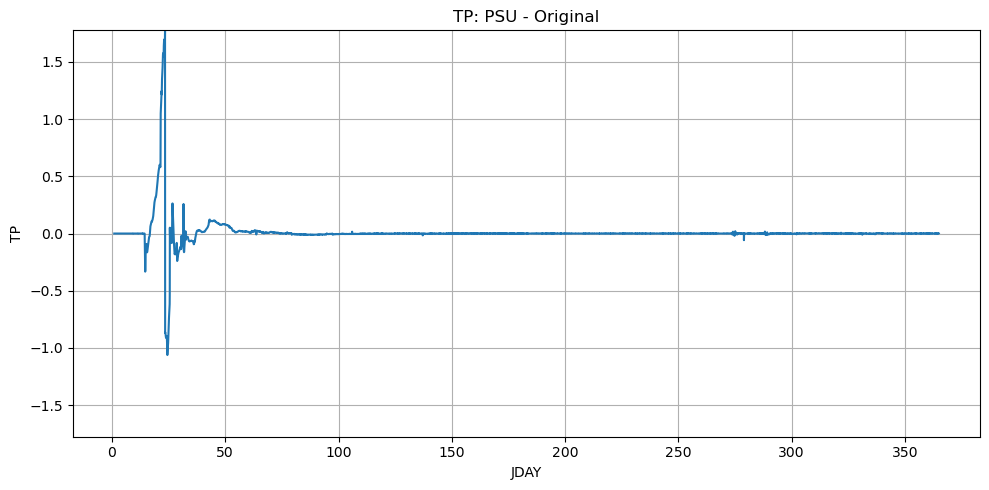

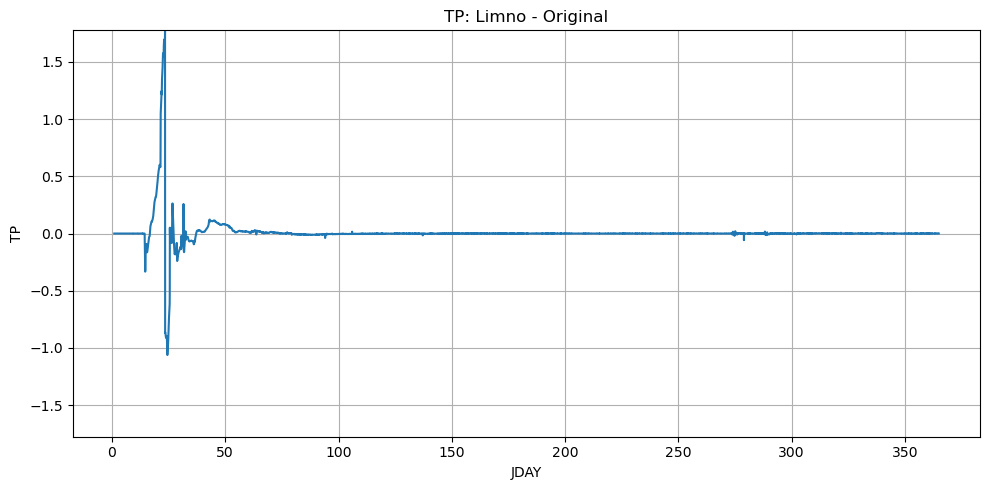

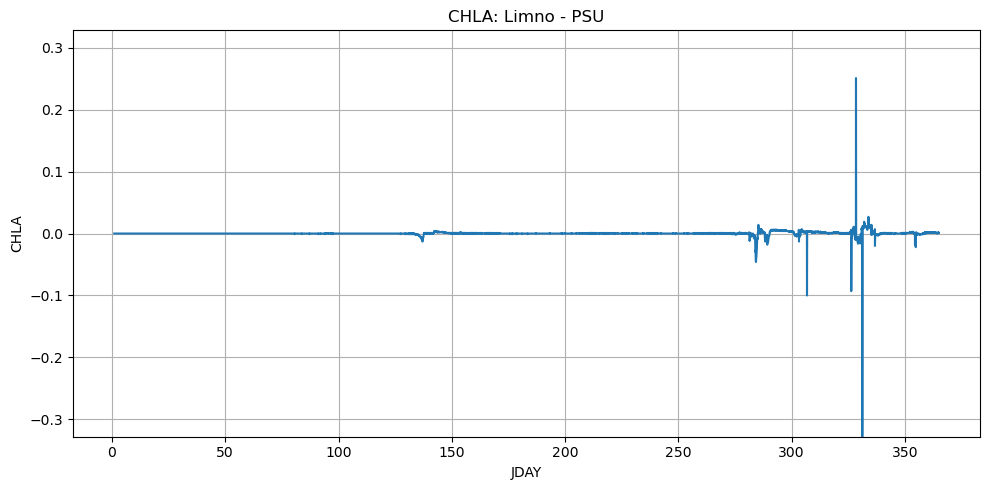

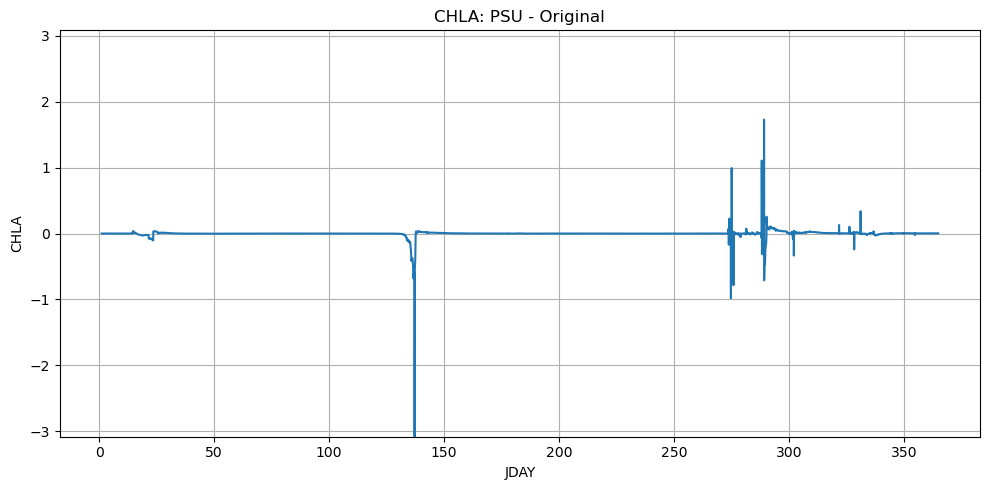

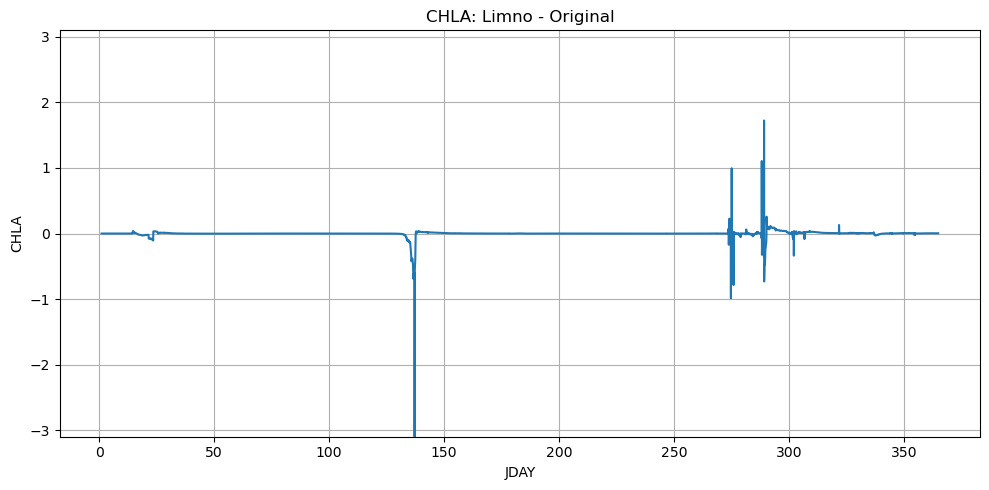

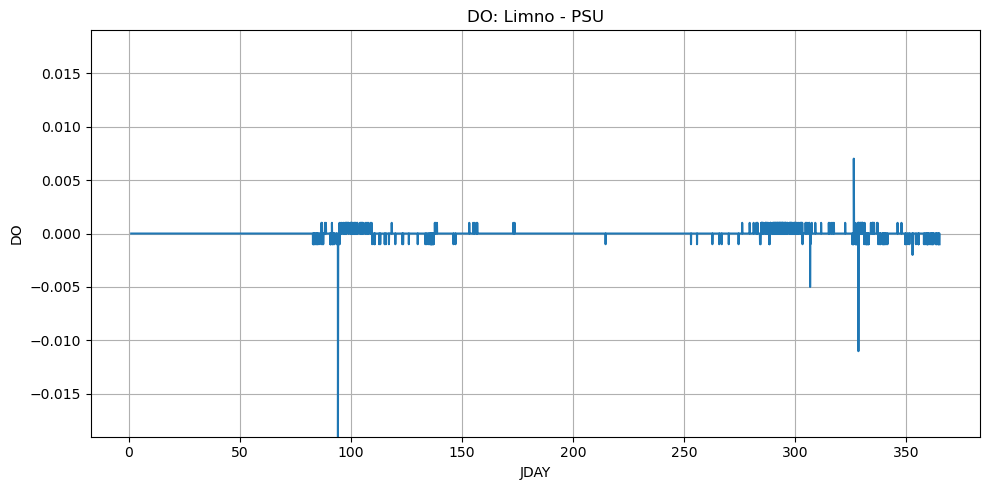

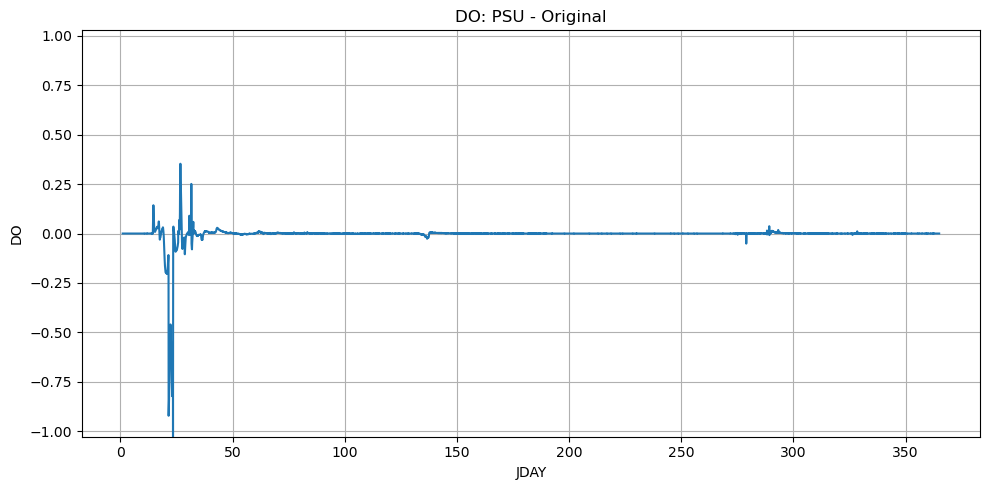

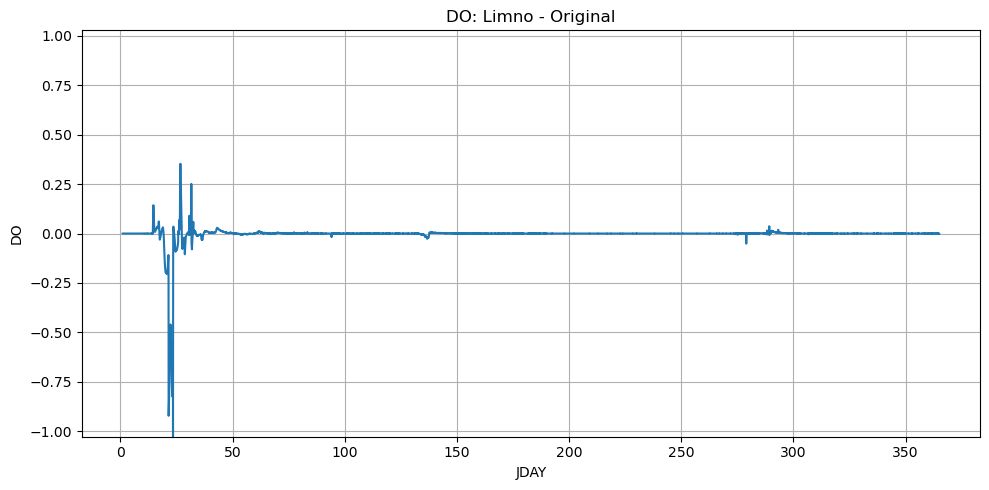

In [9]:
variables_to_plot = ['DLT (s)', 'Q (m3s-1)', 'DOREAR (kg/d)', 'TP', 'CHLA', 'DO']

for var in variables_to_plot:
    # display(HTML("<hr style='border: none; border-bottom: 1px solid dodgerblue;'>"))
    # display(HTML(f"<h3 style='text-align:center; color: dodgerblue;'>{var}</h3>"))
    # display(HTML("<hr style='border: none; border-top: 1px solid dodgerblue;'>"))
    display(HTML(f"<hr style='border: none; border-bottom: 1px solid dodgerblue;'><h3 style='text-align:center; color: dodgerblue;'>{var}</h3><hr style='border: none; border-top: 1px solid dodgerblue;'>"))
    for name, df in comparison_frames.items():
        y = df[var]
        y_max = y.abs().max()  # Find the maximum absolute value for symmetry
        plt.figure(figsize=(10, 5))
        plt.plot(df['JDAY'], y, label=f'{var} Difference')
        plt.title(f'{var}: {name}')
        plt.xlabel('JDAY')
        plt.ylabel(var)
        plt.ylim(-y_max, y_max)  # Symmetrical y-axis limits
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Check if all JDAY columns are equal element-wise

In [10]:
jday_equal_limno_psu = df_limno['JDAY'].equals(df_psu['JDAY'])
jday_equal_psu_original = df_psu['JDAY'].equals(df_original['JDAY'])
jday_equal_limno_original = df_limno['JDAY'].equals(df_original['JDAY'])

print("Limno vs PSU JDAY identical:", jday_equal_limno_psu)
print("PSU vs Original JDAY identical:", jday_equal_psu_original)
print("Limno vs Original JDAY identical:", jday_equal_limno_original)

Limno vs PSU JDAY identical: False
PSU vs Original JDAY identical: False
Limno vs Original JDAY identical: False


Show where mismatches occur

In [11]:
if not jday_equal_limno_psu:
    print("\nLimno vs PSU - JDAY differences:")
    print((df_limno['JDAY'] - df_psu['JDAY']).abs().describe())

if not jday_equal_psu_original:
    print("\nPSU vs Original - JDAY differences:")
    print((df_psu['JDAY'] - df_original['JDAY']).abs().describe())

if not jday_equal_limno_original:
    print("\nLimno vs Original - JDAY differences:")
    print((df_limno['JDAY'] - df_original['JDAY']).abs().describe())


Limno vs PSU - JDAY differences:
count    8736.000000
mean        0.000002
std         0.000048
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: JDAY, dtype: float64

PSU vs Original - JDAY differences:
count    8736.000000
mean        0.000004
std         0.000060
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: JDAY, dtype: float64

Limno vs Original - JDAY differences:
count    8736.000000
mean        0.000003
std         0.000057
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001000
Name: JDAY, dtype: float64


Plot the JDAY differences

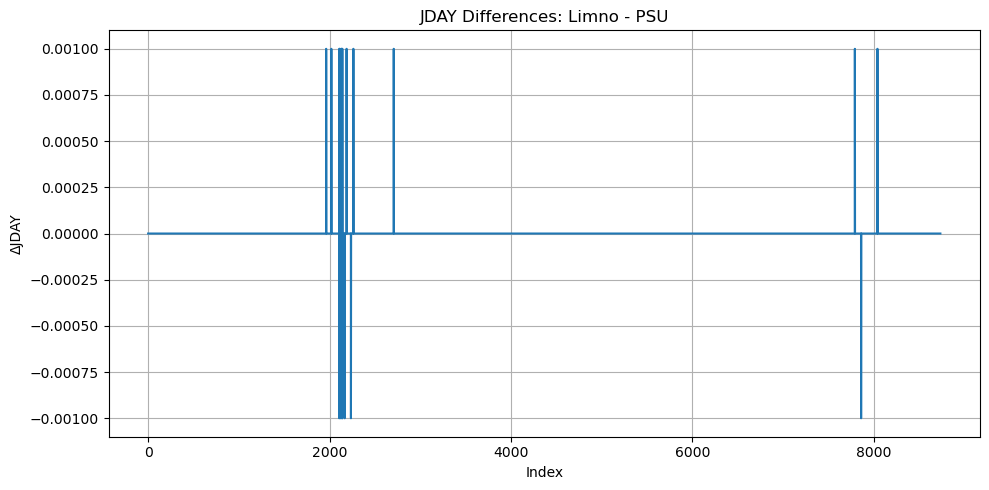

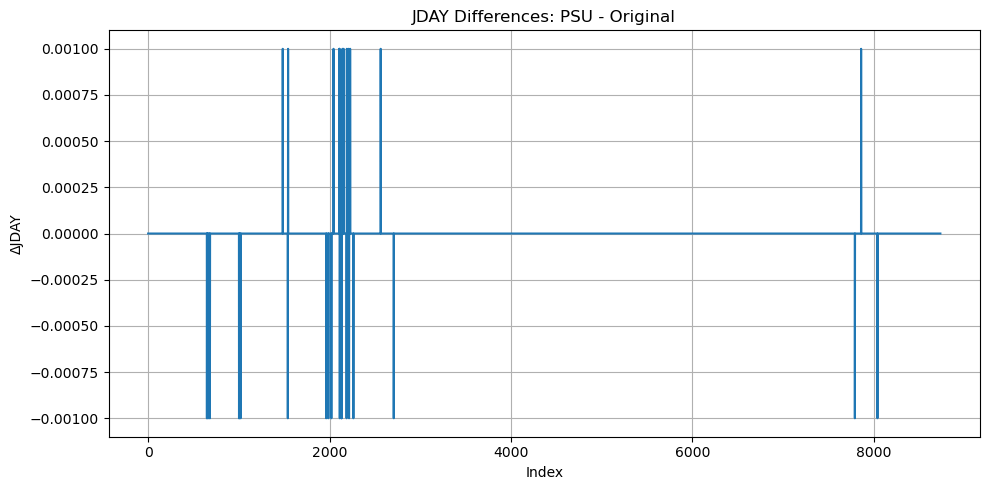

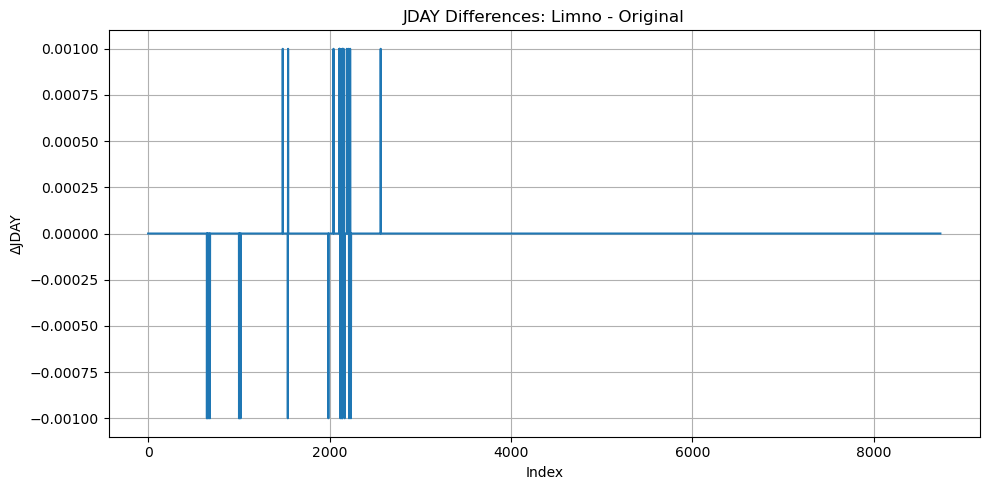

In [12]:
def plot_jday_diff(df1, df2, label):
    plt.figure(figsize=(10, 5))
    plt.plot(df1['JDAY'] - df2['JDAY'])
    plt.title(f'JDAY Differences: {label}')
    plt.ylabel('ΔJDAY')
    plt.xlabel('Index')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if not jday_equal_limno_psu:
    plot_jday_diff(df_limno, df_psu, 'Limno - PSU')

if not jday_equal_psu_original:
    plot_jday_diff(df_psu, df_original, 'PSU - Original')

if not jday_equal_limno_original:
    plot_jday_diff(df_limno, df_original, 'Limno - Original')
